# Classification and Regression
By: Adam Li

1. State Assumptions
2. Formally define a classification and regression problem
3. Provide an algorithm to solve classification/regression
4. Sample simulated data 
5. Compute accuracy
6. Plot accuracy vs. N
7. 

### Step 1: State Assumptions
$D = {d_1, ..., d_{96}}$ are our data columns representing f0, f1, ..., f3. Our assumption is that all variables/metrics come from a continuous distribution. 

In addition, $L = {x,y,z}$, our location data are continuous. 

### Step 2: Formally Define Classification/Regression Problem
Since our data is unsupervised, we want to just run some simple regressions on each column of data to see if we can predict a column based on the other 95 columns.

$$H_o: d_i, d_j \in D \ \forall \ i \neq j \ are\ independent$$ 
$$H_a: \exists i \neq j \ s.t. d_i \ dependent \ on \ d_j$$

D is our data matrix. i and j are indices.

### Step 3: Algorithm For Solving This Regression Problem
regression: linear regression, support vector regression, k-nearest neighbour regression, random forest regression, polynomial regression

Our regression model:



##### Class Notes
Bayes Optimal Classifier
g = argmin ( E[loss(g(x), y)] )
g = argmax(F(x=x|y=y)*F(y=y))
leave 1 out analysis
LDA
SVM
Logistic Regression
### Linear Discriminant Analysis
Under the assumption of F(x|y) = N(u, 1) and F(y) = Bernoulli(pi). Variances are same across classes.
- very interpretable
- fast 
- linear boundary 
### Quadratic Discriminant Analysis
Under similar assumptions, except assume variances are different across classes.
- interpretable
- fast
LDA and QDA converges to Bayes classifier under certain assumptions
### K-nearest neighbors
- not interpretable as LDA/QDA
- not fast
- consistent

In [1]:
# Import Necessary Libraries
import numpy as np
import os, csv

from matplotlib import pyplot as plt

import scipy

# Regression
from sklearn import cross_validation
from sklearn.cross_validation import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

# Classification
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Steps 4 & 5: Sample data from setting similar to data and record classification accuracy


In [2]:
np.random.seed(12345678)  # for reproducibility, set random seed
r = 20  # define number of rois
N = 100 # number of samples at each iteration
p0 = 0.10
p1 = 0.15
# define number of subjects per class
S = np.array((8, 16, 20, 32, 40, 64, 80, 100, 120, 200, 320,
              400, 800, 1000))

names = ["Linear Regression", 
         "Support Vector Regression", 
         "Nearest Neighbors", 
         "Random Forest"] #, "Polynomial Regression"]

regressors = [
    LinearRegression(),
    SVR(kernel="linear", C=0.5, epsilon=0.01),
    KNeighborsRegressor(6, weights="distance"),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1)
    ]

In [3]:
accuracy = np.zeros((len(S), len(regressors), 2), dtype=np.dtype('float64'))

# sample data accordingly for each # of simulations
for idx1, s in enumerate(S):
    s0 = s/2
    s1 = s/2
    
    # null regression y = a + bx + episilon
    X = np.random.normal(0, 1, s)
    epsilon = np.random.normal(0, 0.05, s)
    a = np.random.rand(s,) 
    b = 5 #np.random.rand(s,)*5
    y = a + b*X + epsilon
    
    # reshape array to make it work with linear regression
    y = y.reshape(-1,1)
    X = y.reshape(-1,1)

    for idx2, regr in enumerate(regressors):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
    
        # Train the model using the training sets
        reg = regr.fit(X_train, y_train)
        
        # leave one out analysis
        loo = LeaveOneOut(len(X))
        
        # compute scores for running this regressor
        scores = cross_validation.cross_val_score(reg, X, y, scoring='mean_squared_error', cv=loo)

        accuracy[idx1, idx2,] = [-scores.mean(), scores.std()]
        print("MSE of %s: %0.2f (+/- %0.2f)" % (names[idx2], -scores.mean(), scores.std() * 2))
print accuracy


MSE of Linear Regression: 0.00 (+/- 0.00)
MSE of Support Vector Regression: 0.00 (+/- 0.00)
MSE of Nearest Neighbors: 7.21 (+/- 37.14)
MSE of Random Forest: 4.57 (+/- 21.66)
MSE of Linear Regression: 0.00 (+/- 0.00)
MSE of Support Vector Regression: 0.00 (+/- 0.00)
MSE of Nearest Neighbors: 4.92 (+/- 22.44)
MSE of Random Forest: 3.28 (+/- 14.34)
MSE of Linear Regression: 0.00 (+/- 0.00)
MSE of Support Vector Regression: 0.00 (+/- 0.00)
MSE of Nearest Neighbors: 3.48 (+/- 18.13)
MSE of Random Forest: 1.50 (+/- 7.33)
MSE of Linear Regression: 0.00 (+/- 0.00)
MSE of Support Vector Regression: 0.00 (+/- 0.00)
MSE of Nearest Neighbors: 0.82 (+/- 6.51)
MSE of Random Forest: 0.39 (+/- 2.76)
MSE of Linear Regression: 0.00 (+/- 0.00)
MSE of Support Vector Regression: 0.00 (+/- 0.00)
MSE of Nearest Neighbors: 0.35 (+/- 2.57)
MSE of Random Forest: 0.23 (+/- 1.72)
MSE of Linear Regression: 0.00 (+/- 0.00)
MSE of Support Vector Regression: 0.00 (+/- 0.00)
MSE of Nearest Neighbors: 0.53 (+/- 5.25)
M

## STEP 6: PLOTTING ACCURACY VS. N FOR EACH REGRESSOR


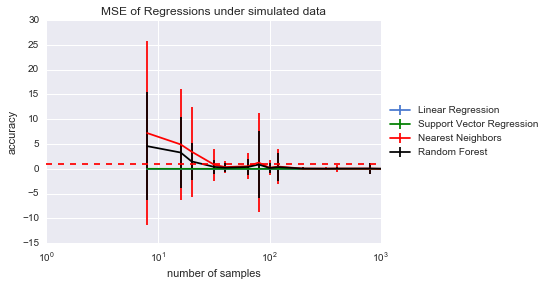

In [6]:
plt.errorbar(S, accuracy[:,0,0], yerr = accuracy[:,0,1], hold=True, label=names[0])
plt.errorbar(S, accuracy[:,1,0], yerr = accuracy[:,1,1], color='green', hold=True, label=names[1])
plt.errorbar(S, accuracy[:,2,0], yerr = accuracy[:,2,1], color='red', hold=True, label=names[2])
plt.errorbar(S, accuracy[:,3,0], yerr = accuracy[:,3,1], color='black', hold=True, label=names[3])
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('accuracy')
plt.title('MSE of Regressions under simulated data')
plt.axhline(1, color='red', linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# null regression y = a + bx + episilon
x = np.random.normal(0, 1, s)
epsilon = np.random.normal(0, 0.05, s)
a = np.random.rand(s,) 
b = np.random.rand(s,)
y = a + b*x + epsilon
y = np.reshape(y, (s,1))
X = np.reshape(X, (s,1))

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

# Train the model using the training sets
# reg = SVR(kernel="linear", C=1.).fit(X_train, y_train)
reg = KNeighborsRegressor(5).fit(X_train, y_train)

print reg
print X.shape
print epsilon.shape
print y.shape

## STEP 7: APPLYING REGRESSIONS TO COLUMNS OF FEATURES



## STEP 8: DISCUSSION:
